## Case study on Pre-processing
### Do the following on titanic dataset.

1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the dataset into python environment

In [43]:
data=pd.read_csv(r"D:\activity\titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Make ‘PassengerId’ as the index column

In [4]:
data.set_index("PassengerId",inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 3.Check the basic details of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### Insights
1. There are 891 rows and 11 columns.
2. Two float type, 4 int type and 5 object type columns.
3. Age, Cabin, Embarked columns have 177, 687, 2 null values respectively.

### 4.Fill in all the missing values present in all the columns in the dataset

(1) filling missing values of age column.

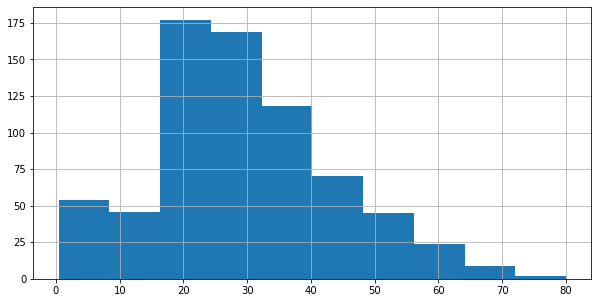

In [8]:
freqgraph=data['Age']
freqgraph.hist(figsize=(10,5))
plt.show()

In [9]:
data['Age']=data['Age'].fillna(data['Age'].median())

data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Since the Age coloumn is right skewed, we can replace the missing values with median of the Age column.

(2) filling missing values of cabin column.

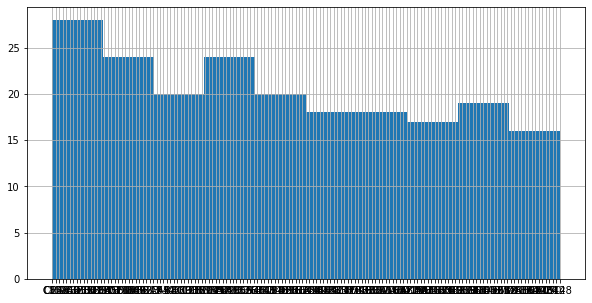

In [13]:
freqgraph=data['Cabin']
freqgraph.hist(figsize=(10,5))
plt.show()

More than 50% of the cabin column are unknown because of that we cant get any useful insights from that particular column.It is better to drop that column.

In [12]:
data1=data.drop("Cabin",axis=1)
data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


(2) filling missing values of embarked  column.

In [17]:
data['Embarked'].mode()[0]

'S'

In [14]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

 the Embarked column is categorical data, we can fill it's missing value with most frequently occured item ie mode. (S).

### 5. Check and handle outliers in at least 3 columns in the dataset
#### 1. Pclass column

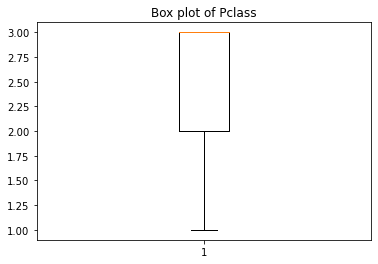

In [18]:
plt.boxplot(data['Pclass'])
plt.title('Box plot of Pclass')
plt.show()

No outliers are present in pclass column.

#### 2.Age

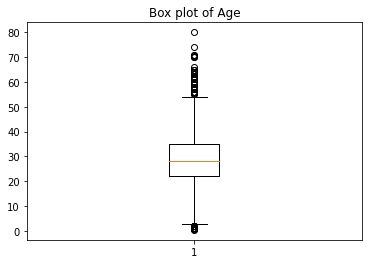

In [19]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')
plt.show()

In [20]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')

IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

print('The values of Age below',low_lim,'and the values  of Age above',up_lim,'are outliers.')

The values of Age below 2.5 and the values  of Age above 54.5 are outliers.


In [21]:
outlier=[]
for x in data['Age']:
    if x > up_lim or x < low_lim:
        outlier.append(x)
        
print('There are',len(outlier),'outliers in Age column.','\n')
print('Outliers are:',outlier)

There are 66 outliers in Age column. 

Outliers are: [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [22]:
ind1,ind2=data['Age'] > up_lim,data['Age'] < low_lim
i1=data.loc[ind1].index
i2=data.loc[ind2].index
print('The index values of the outliers which are above upper limit:',i1,'\n')
print('The Index values of the outliers which are below lower limit:',i2)

The index values of the outliers which are above upper limit: Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId') 

The Index values of the outliers which are below lower limit: Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')


In [23]:
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880,8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

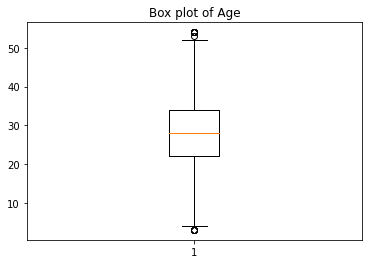

In [24]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')
plt.show()

In [26]:
data.shape

(825, 11)

#### 3.SibSp Column

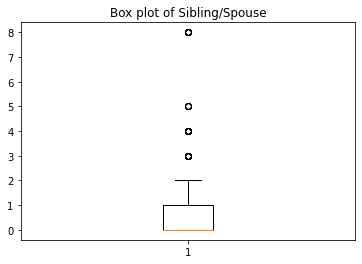

The Q1 value: 0.0
The Q2 value: 0.0
The Q3 value: 1.0
The values below -1.5 and the values above 2.5 are outliers.


In [44]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of Sibling/Spouse')
plt.show()
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('The values below',low_lim,'and the values above',up_lim,'are outliers.')

In [45]:
outlier=[]
for x in data['SibSp']:
    if x > up_lim or x < low_lim:
        outlier.append(x)
        
print('There are',len(outlier),'outliers in sibsp column.','\n')
print('Outliers are:',outlier)
ind1,ind2=data['SibSp'] > up_lim,data['SibSp'] < low_lim
i1=data.loc[ind1].index
i2=data.loc[ind2].index
print('The index values of the outliers which are above upper limit:',i1,'\n')
print('The Index values of the outliers which are below lower limit:',i2)

There are 46 outliers in sibsp column. 

Outliers are: [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]
The index values of the outliers which are above upper limit: Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64') 

The Index values of the outliers which are below lower limit: Int64Index([], dtype='int64')


In [29]:
data.drop([25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],inplace=True)

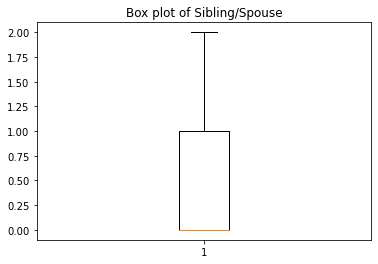

In [30]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of Sibling/Spouse')
plt.show()

In [31]:
data.shape

(786, 11)

#### 4.Fare column

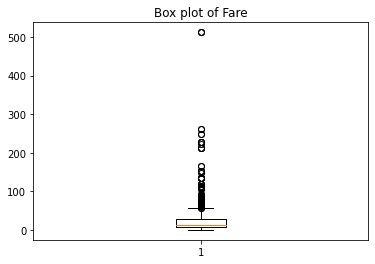

The Q1 value: 7.8958
The Q2 value: 13.0
The Q3 value: 27.75
The values below -21.885499999999997 and the values above 57.5313 are outliers.


In [32]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')
plt.show()

Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('The values below',low_lim,'and the values above',up_lim,'are outliers.')

In [33]:
outlier=[]
for x in data['Fare']:
    if x > up_lim or x < low_lim:
        outlier.append(x)
        
print('There are',len(outlier),'outliers in Fare column.','\n')
print('Outliers are:',outlier)
ind1,ind2=data['Fare'] > up_lim,data['Fare'] < low_lim
i1=data.loc[ind1].index
i2=data.loc[ind2].index
print('The index values of the outliers which are above upper limit:',i1,'\n')
print('The Index values of the outliers which are below lower limit:',i2)

There are 102 outliers in Fare column. 

Outliers are: [71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 61.175, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 61.3792, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 135.6333, 57.9792, 153.4625, 133.65, 66.6, 134.5, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 59.4, 93.5, 57.9792, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 120.0, 93.5, 83.1583, 89.1042, 164.8667]
The index values of the outliers which are above upper limit: Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98,

In [35]:
ind1=data['Fare'] > up_lim
i1=data.loc[ind1].index
print('The index values of the outliers are:',i1)

data.drop(i1,inplace=True)

The index values of the outliers are: Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=102)


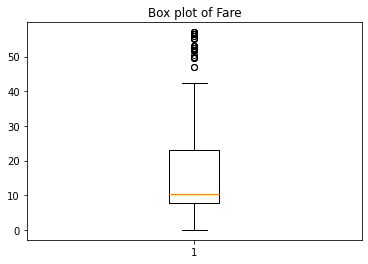

In [36]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')
plt.show()

In [37]:
data.shape

(684, 11)

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [38]:
x=data.drop(['Survived','Name'],axis=1)

In [39]:
# since categorical datas are present we can do One Hot encoding prior to Min Max Scaling.
# Inorder to convert those data into numerical values.
x=pd.get_dummies(x)
x


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110465,Ticket_110564,Ticket_111320,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,26.0,0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,3,28.0,0,0,8.4583,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,3,28.0,1,2,23.4500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
col=x.columns

In [41]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)

x=pd.DataFrame(x)
x.columns=col
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110465,Ticket_110564,Ticket_111320,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,...,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.752193,0.502207,0.135965,0.044591,0.286268,0.309942,0.690058,0.002924,0.001462,0.001462,...,0.002924,0.002924,0.004386,0.001462,0.001462,0.004386,0.001462,0.146199,0.099415,0.754386
std,0.357408,0.185072,0.250491,0.125948,0.221255,0.462808,0.462808,0.054034,0.038236,0.038236,...,0.054034,0.054034,0.066130,0.038236,0.038236,0.066130,0.038236,0.353564,0.299438,0.430766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.000000,0.000000,0.137793,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.490196,0.000000,0.000000,0.184211,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.588235,0.000000,0.000000,0.404605,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
